# Ensemble Techniques Project

## Introduction

**Context**: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

Data Attributes:
 - Churn: Customers who left within the last month
 - Phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies: Services that each customer has signed up for
 - How long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges: Customer account information
 - Gender, age range, and if they have partners and dependents: Demographic info about customers


Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
import pickle
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

Mount Google Drive in order to save the best model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset

In [3]:
tcust1_df = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [4]:
tcust2_df = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
tcust1_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [6]:
tcust2_df.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
tcust_df = pd.merge(tcust1_df, tcust2_df, on='customerID')

In [8]:
tcust1_df.shape

(7043, 10)

In [9]:
tcust1_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [10]:
tcust2_df.shape

(7043, 12)

In [11]:
tcust2_df.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
tcust_df.shape

(7043, 21)

In [13]:
tcust_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
tcust1_df.columns.difference(tcust_df.columns.difference(tcust2_df.columns))

Index(['customerID'], dtype='object')

## Data Preparation and Analysis

Check for missing values

In [15]:
tcust_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the dataset

In [16]:
col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in col:
  print(i)
  print(tcust_df[i].unique())
  print(tcust_df[i].nunique())


gender
['Female' 'Male']
2
Partner
['Yes' 'No']
2
Dependents
['No' 'Yes']
2
PhoneService
['No' 'Yes']
2
MultipleLines
['No phone service' 'No' 'Yes']
3
InternetService
['DSL' 'Fiber optic' 'No']
3
OnlineSecurity
['No' 'Yes' 'No internet service']
3
OnlineBackup
['Yes' 'No' 'No internet service']
3
DeviceProtection
['No' 'Yes' 'No internet service']
3
TechSupport
['No' 'Yes' 'No internet service']
3
StreamingTV
['No' 'Yes' 'No internet service']
3
StreamingMovies
['No' 'Yes' 'No internet service']
3
Contract
['Month-to-month' 'One year' 'Two year']
3
PaperlessBilling
['Yes' 'No']
2
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4
Churn
['No' 'Yes']
2


The values as seen above are all expected values except for MultipleLines where 'No Phone service' and 'No' refer to the same. Hence modify rows having 'No phone service' as 'No'

In [17]:
tcust_df['MultipleLines']=tcust_df['MultipleLines'].replace(['No phone service'],'No')

In [18]:
tcust_df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
tcust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert TotalCharges to float

In [20]:
tcust_df['TotalCharges'] = pd.to_numeric(tcust_df['TotalCharges'], errors='coerce')

In [21]:
tcust_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting TotalCharges to float, there seem to be 11 such values which are missing. Since he missing value count is very small, we can drop them

In [22]:
tcust_df.dropna(inplace = True)

In [23]:
tcust_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
tcust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Chart Categorical Features

In [25]:
#plot the graphs of categorical variable to see the distributions.
def categoricalgraph(df):
  cat_data=df.select_dtypes(include=['object']).columns
  plt.figure(figsize=(18, 18))
  for i, col in enumerate(cat_data):
    ax = plt.subplot(5,4, i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%');
    plt.title(col)
  plt.suptitle('Piechart  of categorical variables')

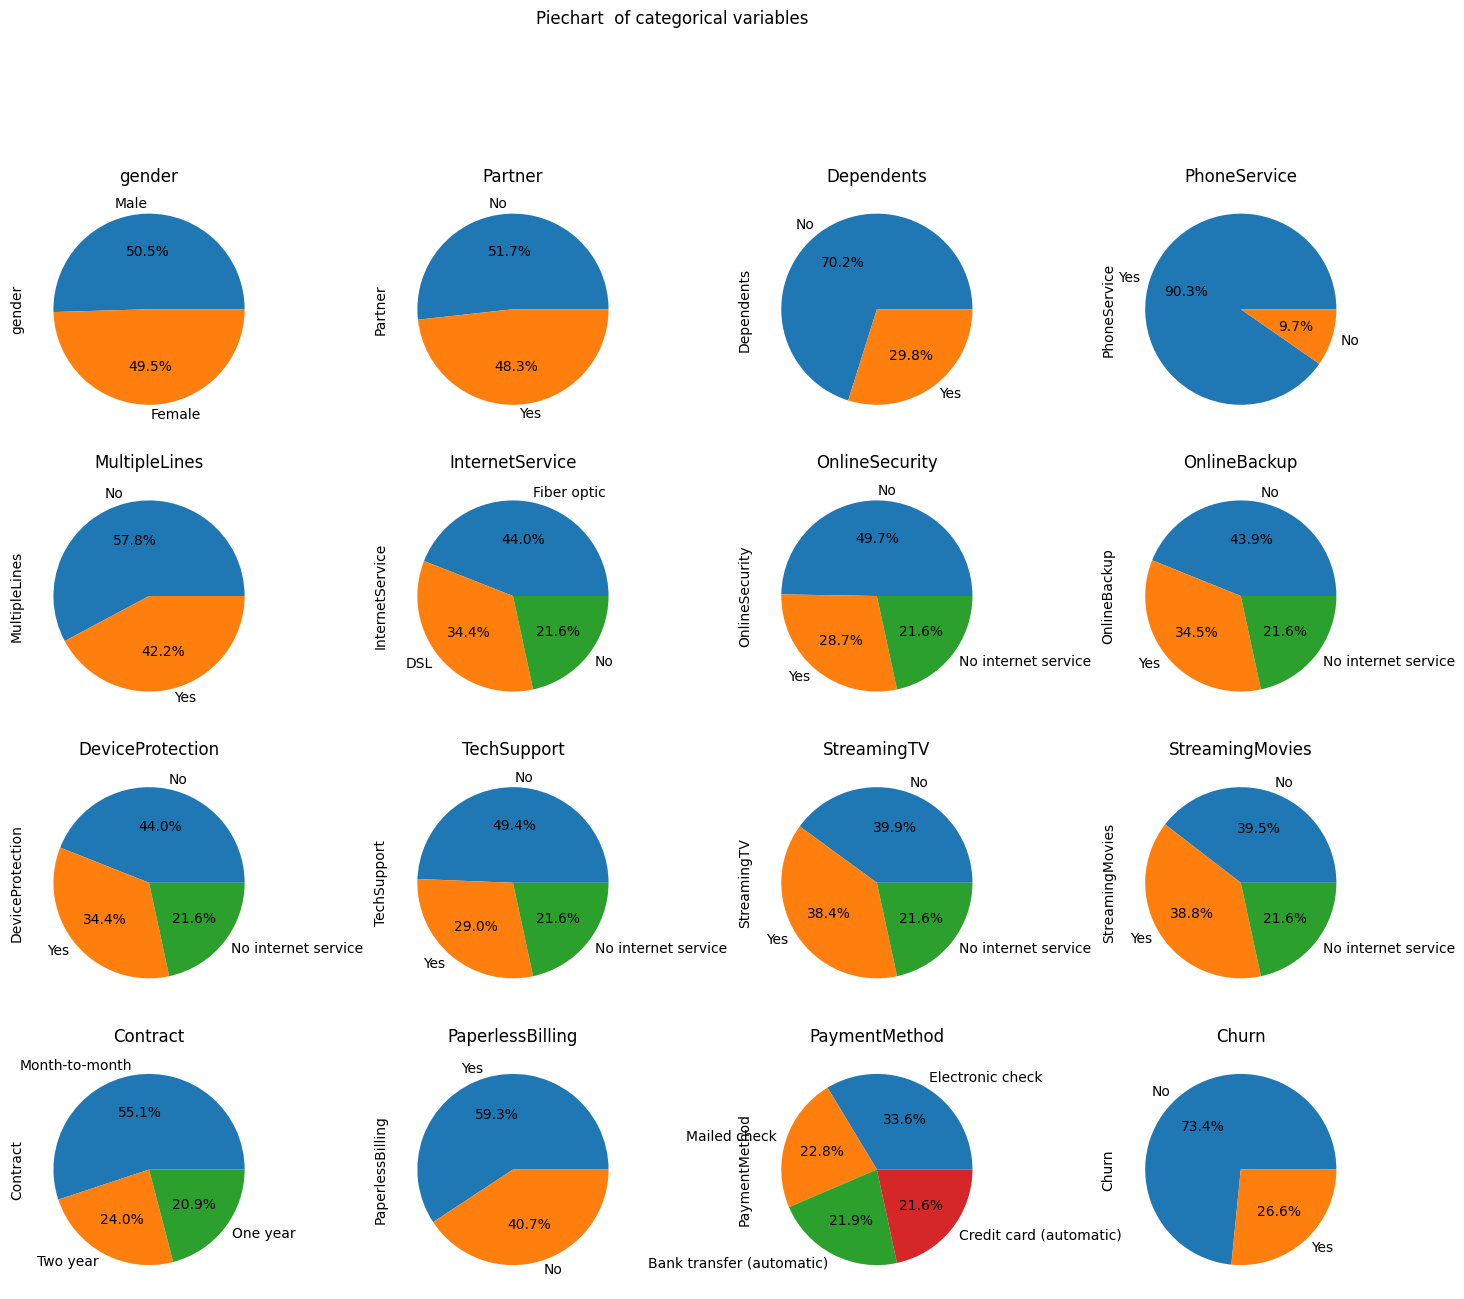

In [26]:
char = tcust_df.drop('customerID',axis=1)
categoricalgraph(char)

Insights from above:

Churn, which is the Target variable is imbalanced with only 26.6% rows having churn as 'yes'.

Similarly, PhoneService is heavily imbalanced in favour of 'yes' which is expected since almost everyone have a phone these days.

Features like MultipleLines, TechSupport, PaperlessBilling and Contract are also slightly imbalanced since one value is present in greater than 50% of the rows

Encode the Categorical variables

In [27]:
l=LabelEncoder()
for col in tcust_df.columns:
    if tcust_df[col].dtype=='object':
        tcust_df[col]=l.fit_transform(tcust_df[col])

In [28]:
tcust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,0,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


Drop customerID since it is not required for building the model

In [29]:
tcust_df.drop('customerID', axis=1, inplace=True)

In [30]:
tcust_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [31]:
tcust_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

The dataset seems to be imbalanced with majority of Churn as 0 or No. We'll use SMOTE to oversample the dataset

In [32]:
x = tcust_df.drop(['Churn'], axis = 1)
y = tcust_df['Churn']
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [33]:
print(y.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((8260, 19), (2066, 19))

Standardize the dataset

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Training and Evaluation

Apply XGBoost Classifier Algorithm and print the accuracy.

In [36]:
params = {
 'learning_rate' : [0.20,0.30],
 'max_depth' : [ 6, 10],
 'gamma': [ 0.3, 0.4 ],
}

xgbc = xgb.XGBClassifier()
rs_model=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)
rs_model.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.4],
                                        'learning_rate': [0.2, 0.3],
                                        'max_depth': [6, 10]},
                   scoring='roc_auc', verbose=3)

In [37]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
xgbcrs = xgb.XGBClassifier(gamma=0.3, learning_rate=0.3, max_depth=6)
xgbcrs.fit(x_train, y_train)
pred_xgb =xgbcrs.predict(x_test)
acc_xgb = accuracy_score(y_test, pred_xgb)
print('Train Accuracy: ',xgbcrs.score(x_train, y_train))
print('Test Accuracy: ',acc_xgb)

Train Accuracy:  0.9276029055690073
Test Accuracy:  0.8417231364956438


This model generated by RandomSearchCV is overfitting as is seen in the train and test accuracy

In [39]:
print("classification  Matrix:\n",classification_report(y_test,pred_xgb))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1037
           1       0.83      0.86      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



<Axes: >

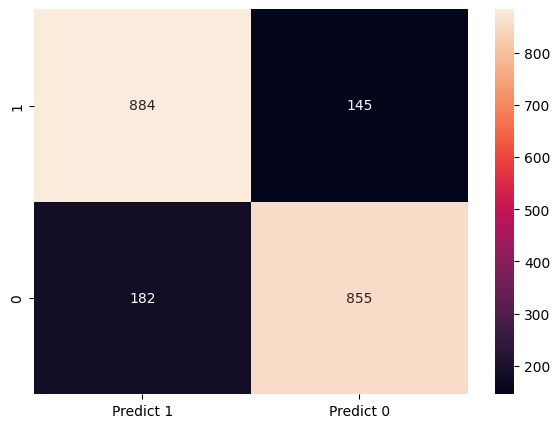

In [40]:
cmrs = confusion_matrix(y_test, pred_xgb, labels=[1, 0])

df_cmrs = pd.DataFrame(cmrs, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmrs, annot=True, fmt='g')

In [41]:
params = {
 'learning_rate' : [0.10,0.20,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8],
 'gamma': [ 0.1, 0.2 , 0.3],
}

xgbc = xgb.XGBClassifier()
gs_model=GridSearchCV(xgbc,params,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)
gs_model.fit(x_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 8]},
             scoring='roc_auc', verbose=3)

In [42]:
print(gs_model.best_estimator_)
print(gs_model.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 3}


In [43]:
xgbcgs = xgb.XGBClassifier(gamma=0.1, learning_rate=0.2, max_depth=4)
xgbcgs.fit(x_train, y_train)
pred_xgbgs =xgbcrs.predict(x_test)
acc_xgbgs = accuracy_score(y_test, pred_xgbgs)
print('Train Accuracy: ',xgbcgs.score(x_train, y_train))
print('Test Accuracy: ',acc_xgbgs)

Train Accuracy:  0.8767554479418886
Test Accuracy:  0.8417231364956438


This model generated by GridSearchCV has a better test accuracy

In [44]:
print("classification  Matrix:\n",classification_report(y_test,pred_xgbgs))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1037
           1       0.83      0.86      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



<Axes: >

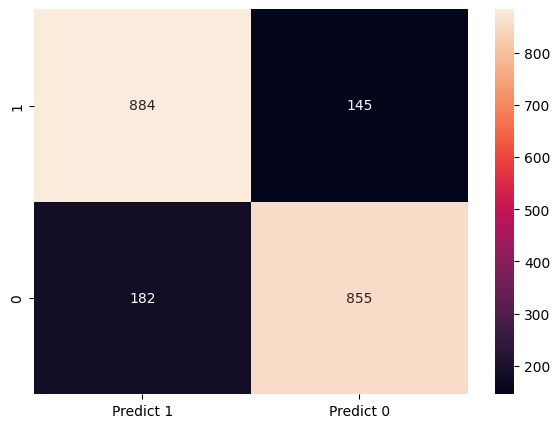

In [45]:
cm = confusion_matrix(y_test, pred_xgbgs, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#Build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

In [46]:
def Read_data(path_to_csv):
  df = pd.read_csv(path_to_csv)
  return df

In [47]:
def preprocess_data(data, target_feature):
  # impute missing values
  # drop rows if number of rows having missing value is less than 1% of the entire dataset
  # else replace the null values with mode
  high_null = 0
  for i in range(0,len(data.columns)):
    if data.isnull().sum()[i] > high_null:
      high_null = data.isnull().sum()[i]

  if high_null < (0.01*data.shape[0]):
    data.dropna(axis=0,inplace=True)
  else:
    data.fillna(data.mode().iloc[0])

  #Encode categorical variables
  l=LabelEncoder()
  for col in data.columns:
    if data[col].dtype=='object':
        data[col]=l.fit_transform(data[col])


  # Determination of necessary features to be retained for building model
  # features which have a correlation < 0.5 with the target variable can be dropped
  target = data[target_feature]
  data.drop(target_feature, axis=1,inplace=True)

  # Oversample in case of imbalanced data
  imbalance = False
  for i in range(0,len(target.value_counts())):
    if target.value_counts()[i] > 0.7*target.shape[0]:
      imbalance = True

  if imbalance == True:
    oversample = SMOTE()
    data, target = oversample.fit_resample(data, target)

  return data, target


In [48]:
def build_model(data, target):
  # split the dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

  # Logistic Regression
  lr = LogisticRegression(solver="liblinear")
  lr.fit(X_train, y_train)
  lr_pred = lr.predict(X_test)
  resultsdf = pd.DataFrame({'Method':['Logistic Regression'], 'Train Accuracy': lr.score(X_train, y_train),'Test Accuracy': lr.score(X_test, y_test),
                          'Precision': precision_score(y_test, lr_pred), 'Recall': recall_score(y_test, lr_pred),
                          'F1-Score': f1_score(y_test, lr_pred)})

  #KNN
  knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  tempResultsdf = pd.DataFrame({'Method':['KNN'], 'Train Accuracy': knn.score(X_train, y_train),'Test Accuracy': knn.score(X_test, y_test),
                          'Precision': precision_score(y_test, knn_pred), 'Recall': recall_score(y_test, knn_pred),
                          'F1-Score': f1_score(y_test, knn_pred)})
  resultsdf = pd.concat([resultsdf, tempResultsdf])

  #SVM
  svc = svm.SVC(gamma=0.001, C=1000, kernel='rbf')
  svc.fit(X_train , y_train)
  svc_pred = svc.predict(X_test)
  tempResultsdf = pd.DataFrame({'Method':['SVM'], 'Train Accuracy': svc.score(X_train, y_train),'Test Accuracy': svc.score(X_test, y_test),
                          'Precision': precision_score(y_test, svc_pred), 'Recall': recall_score(y_test, svc_pred),
                          'F1-Score': f1_score(y_test, svc_pred)})
  resultsdf = pd.concat([resultsdf, tempResultsdf])

  #Random Forest
  rfcl = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 4)
  rfcl = rfcl.fit(X_train, y_train)
  rfcl_pred = rfcl.predict(X_test)
  tempResultsdf = pd.DataFrame({'Method':['Random Forest'], 'Train Accuracy': rfcl.score(X_train, y_train),'Test Accuracy': rfcl.score(X_test, y_test),
                          'Precision': precision_score(y_test, rfcl_pred), 'Recall': recall_score(y_test, rfcl_pred),
                          'F1-Score': f1_score(y_test, rfcl_pred)})
  resultsdf = pd.concat([resultsdf, tempResultsdf])

  #XGBoost
  xgbc = xgb.XGBClassifier(gamma=0.3, learning_rate=0.3, max_depth=4)
  xgbc.fit(X_train, y_train)
  xgbc_pred = xgbc.predict(X_test)
  tempResultsdf = pd.DataFrame({'Method':['XGBoost'], 'Train Accuracy': xgbc.score(X_train, y_train),'Test Accuracy': xgbc.score(X_test, y_test),
                          'Precision': precision_score(y_test, xgbc_pred), 'Recall': recall_score(y_test, xgbc_pred),
                          'F1-Score': f1_score(y_test, xgbc_pred)})
  resultsdf = pd.concat([resultsdf, tempResultsdf])

  return resultsdf, lr, knn, svc, rfcl, xgbc

In [49]:
def Model_selection(df, lr, knn, svc, rfcl, xgbc):
  # determine the best model based on the performance parameters
  # in this case, we first get models with Test Accuracy > 80% and Recall > 85%
  # after the previous criteria, we get the model with the highest Recall, since recall is a better performance parameter to determine churn
  bestmodel = df[['Method','Test Accuracy','Recall']][(df['Recall'] > 0.85) & (df['Test Accuracy'] > 0.8)]
  bestmodel.sort_values(by='Recall', ascending=False)

  # return the best model
  if bestmodel['Method'].iloc[0] == 'Logistic Regression':
    return lr
  elif bestmodel['Method'].iloc[0] == 'KNN':
    return knn
  elif bestmodel['Method'].iloc[0] == 'SVM':
    return svc
  elif bestmodel['Method'].iloc[0] == 'Random Forest':
    return rfcl
  elif bestmodel['Method'].iloc[0] == 'XGBoost':
    return xgbc
  else:
      return 0


In [50]:
def Save_model(model):
  # Save in Google drive path
  path = '/content/drive/MyDrive/Colab Notebooks/PGP AIML/Ensemble'
  pickle.dump(model,open(path+'model.pkl', 'wb'))

In [51]:
def main():
  cust_df = Read_data('TelcomCustomer-Churn_2.csv')
  cust_df['TotalCharges'] = pd.to_numeric(cust_df['TotalCharges'], errors='coerce')
  cust_df.drop('customerID', axis=1, inplace=True)

  cust_df, target = preprocess_data(cust_df, 'Churn')

  results, lr, knn, svc, rfcl, xgbc = build_model(cust_df, target)

  bestmodel = Model_selection(results, lr, knn, svc, rfcl, xgbc)
  print(bestmodel)

  if bestmodel == 0:
    print('No model available')
  else:
    Save_model(bestmodel)

In [52]:
if __name__ == "__main__":
  main()

SVC(C=1000, gamma=0.001)


Based on the various models that were run, SVC seems to be giving the best results based on a combination of Test Accuracy and Recall. This model is saved in the Google Drive path